In [1]:
from matplotlib.colors import ListedColormap
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
  

Aby pokazać problem danych niezbalansowanych, rozważmy porównanie uczenia na zbiorze z równymi klasami i tym samym zbiorze ale gdy usuniemy 90% danych z jednej klasy.

In [2]:
SIZE_1 = 100
SIZE_2 = 100
C_1 = np.array([[0, -0.23], [0.83, 0.93]])
C_2 = C_1 
M1 = np.array([0.25, 0.5])
M2 = M1 + np.array([0.28, -0.34])*1.5
X_0 = np.random.multivariate_normal(M1, C_1, SIZE_1)
X_1 = np.random.multivariate_normal(M2, C_2, SIZE_2)

<ipython-input-2-e08849ad26e8>:7: RuntimeWarning: covariance is not positive-semidefinite.
  X_0 = np.random.multivariate_normal(M1, C_1, SIZE_1)
<ipython-input-2-e08849ad26e8>:8: RuntimeWarning: covariance is not positive-semidefinite.
  X_1 = np.random.multivariate_normal(M2, C_2, SIZE_2)


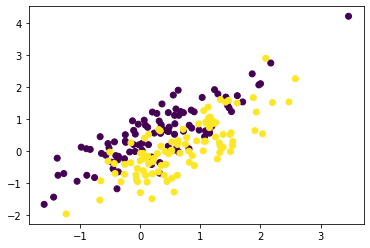

In [3]:
X_large = np.vstack([X_0, X_1])
y_large = np.array([0]*SIZE_1 + [1]*SIZE_2)

plt.scatter(X_large[:, 0], X_large[:, 1], c=y_large)
plt.show()

Uczymy model na pełnych danych

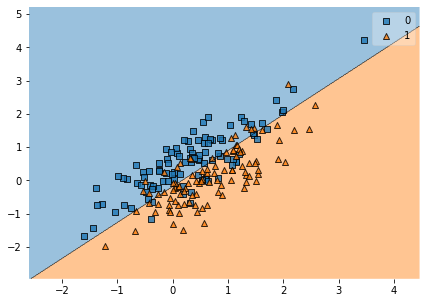

In [4]:
model_large = LogisticRegression()
model_large.fit(X_large, y_large)
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(7, 5))
plot_decision_regions(X_large, y_large, model_large)
plt.show()

Confusion matrix:
 [[78 22]
 [19 81]]


<ipython-input-5-c1f0d42de911>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-5-c1f0d42de911>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


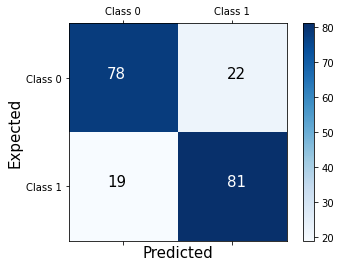

In [5]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_large, y_pred=model_large.predict(X_large))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Expected', fontsize=15)
plt.text(-0.15, 0, conf_mat[0,0], fontsize=15, color="w")
plt.text(-0.15, 1, conf_mat[1,0], fontsize=15, color="k")
plt.text( 0.95, 1, conf_mat[1,1], fontsize=15, color="w")
plt.text( 0.95, 0, conf_mat[0,1], fontsize=15, color="k")
plt.show()

Tworzymy dane niezbalansowane i uczymy model liniowy.

In [6]:
SMALLER_SIZE=20
indices = np.random.choice(SIZE_2, size=SMALLER_SIZE, replace=False)
X_smaller = np.vstack([X_0, X_1[indices, :]])
y_smaller = np.array([0]*SIZE_1 + [1]*SMALLER_SIZE)

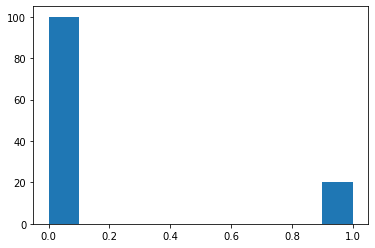

In [7]:
plt.hist(y_smaller)
plt.show()

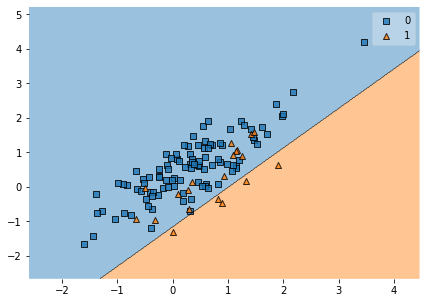

In [8]:
model_smaller = LogisticRegression()
model_smaller.fit(X_smaller, y_smaller)
# plot_decision_boundary(model_smaller, X_smaller, y_smaller, axes=[-3, 3, -3, 3])
# plt.show()

from mlxtend.plotting import plot_decision_regions
model_large = LogisticRegression()
model_large.fit(X_large, y_large)
# plot_decision_boundary(model_large, X_large, y_large, axes=[-3, 3, -3, 3])
# plt.show()
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(7, 5))
plot_decision_regions(X_smaller, y_smaller, model_smaller)
plt.show()

Confusion matrix:
 [[100   0]
 [ 78  22]]


<ipython-input-9-7ea494ed79fc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-9-7ea494ed79fc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


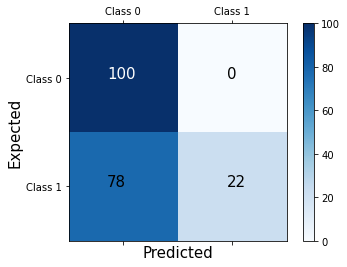

In [9]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_large, y_pred=model_smaller.predict(X_large))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Expected', fontsize=15)
plt.text(-0.15, 0, conf_mat[0,0], fontsize=15, color="w")
plt.text(-0.15, 1, conf_mat[1,0], fontsize=15, color="k")
plt.text( 0.95, 1, conf_mat[1,1], fontsize=15, color="k")
plt.text( 0.95, 0, conf_mat[0,1], fontsize=15, color="k")
plt.show()

Widać, że pomimo tego, że dane pochodzą z tego samego rozkładu co wcześniej, bardzo mocno zmieniła się granica decyzyjna, i w praktyce nie rozdziela już obu rozkładów tak dobrze jak przy zbalansowanych klasach.

#### 1. Undersampling 

W sytuacji, kiedy jednej klasy jest więcej niż drugiej, możemy losowo usunąć obserwacje z liczniejszej klasy, sprowadzając wtedy problem do sytuacji kiedy obie grupy są równoliczne.  

In [10]:
X_smaller_0 = X_smaller[y_smaller == 0, :]
X_smaller_1 = X_smaller[y_smaller == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

(100, 2) (20, 2)
(40, 2) (40,)


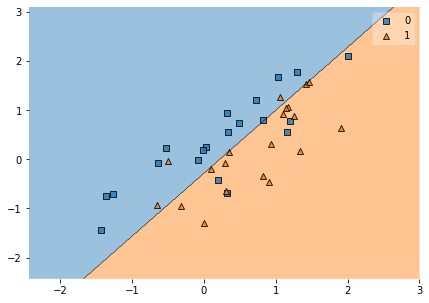

In [11]:
model_undersampled = LogisticRegression()
model_undersampled.fit(X_undersampled, y_undersampled)
# plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])
# plt.show()

model_large = LogisticRegression()
model_large.fit(X_large, y_large)
# plot_decision_boundary(model_large, X_large, y_large, axes=[-3, 3, -3, 3])
# plt.show()
from mlxtend.plotting import plot_decision_regions
plt.figure(figsize=(7, 5))
plot_decision_regions(X_undersampled, y_undersampled, model_undersampled)
plt.show()

Confusion matrix:
 [[74 26]
 [19 81]]


<ipython-input-12-2a9568cd17cc>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-12-2a9568cd17cc>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


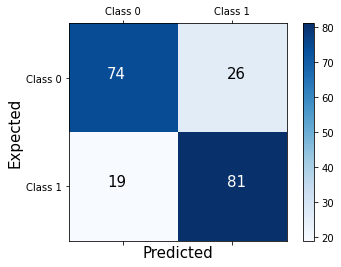

In [12]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_large, y_pred=model_undersampled.predict(X_large))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Expected', fontsize=15)
plt.text(-0.15, 0, conf_mat[0,0], fontsize=15, color="w")
plt.text(-0.15, 1, conf_mat[1,0], fontsize=15, color="k")
plt.text( 0.95, 1, conf_mat[1,1], fontsize=15, color="w")
plt.text( 0.95, 0, conf_mat[0,1], fontsize=15, color="k")
plt.show()

#### 2. Oversampling 

Drugą techniką jest sztuczne zwiększenie liczności jednej z klas poprzez dopróbkowanie obserwacji. Dzięki temu wyrównujemy wielkości obu klas, ale w przeciwieństwie do poprzedniej strategii, nie tracimy informacji.

In [13]:
X_oversampled_1 = np.vstack([X_smaller_1]*5)

In [14]:
X_oversampled = np.vstack([X_smaller_0, X_oversampled_1])

y_oversampled = np.array([0]*X_smaller_0.shape[0] + [1]*X_oversampled_1.shape[0]) 

print(X_oversampled.shape, y_oversampled.shape)

(200, 2) (200,)


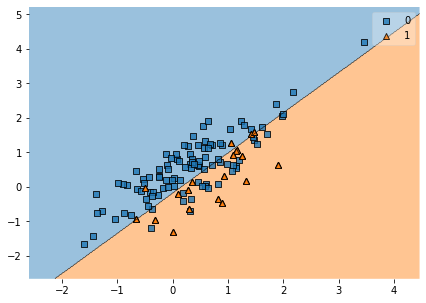

In [15]:
model_oversampled = LogisticRegression()
model_oversampled.fit(X_oversampled, y_oversampled)
# plot_decision_boundary(model_undersampled, X_oversampled, y_oversampled, axes=[-3, 3, -3, 3])
# plt.show()
model_undersampled = LogisticRegression()
model_undersampled.fit(X_oversampled, y_oversampled)
# plot_decision_boundary(model_undersampled, X_undersampled, y_undersampled, axes=[-3, 3, -3, 3])
# plt.show()

plt.figure(figsize=(7, 5))
plot_decision_regions(X_oversampled, y_oversampled, model_undersampled)
plt.show()

Confusion matrix:
 [[74 26]
 [20 80]]


<ipython-input-16-7338552a3d2b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-16-7338552a3d2b>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


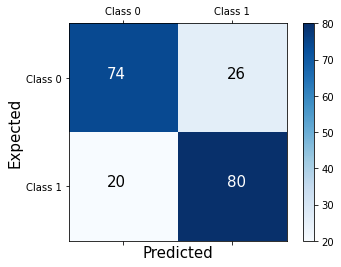

In [16]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_large, y_pred=model_oversampled.predict(X_large))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Expected', fontsize=15)
plt.text(-0.15, 0, conf_mat[0,0], fontsize=15, color="w")
plt.text(-0.15, 1, conf_mat[1,0], fontsize=15, color="k")
plt.text( 0.95, 1, conf_mat[1,1], fontsize=15, color="w")
plt.text( 0.95, 0, conf_mat[0,1], fontsize=15, color="k")
plt.show()

#### 3. Ważona funkcja straty 

Główną przyczyną takiego zachowania modelu jest to, że wartości funkcji straty dla obserwacji z mniej licznej klasy mają proporcjonalnie mniejszy wkład w jej wartość, niż obserwacje z bardziej licznej klasy. Dzięki temu klasyfikator "uczy się", że nie ma sensu dopasowywać się do tych mniej licznych obserwacji, bo zysk z tego będzie niewielki. Możemy więc nadać każdemu punktowi odpowiednią wagę (zależną od klasy) tak, aby zrównoważyło to braki w liczności.

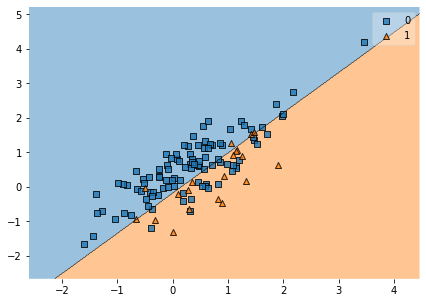

In [17]:
model_weighted = LogisticRegression(class_weight={0:1, 1:5})
model_weighted.fit(X_smaller, y_smaller)

plt.figure(figsize=(7, 5))
plot_decision_regions(X_smaller, y_smaller, model_weighted)
plt.show()

Confusion matrix:
 [[74 26]
 [20 80]]


<ipython-input-18-22c3da61456d>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-18-22c3da61456d>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


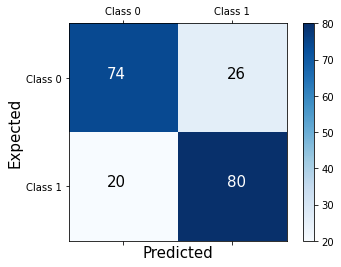

In [18]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_true=y_large, y_pred=model_weighted.predict(X_large))
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Expected', fontsize=15)
plt.text(-0.15, 0, conf_mat[0,0], fontsize=15, color="w")
plt.text(-0.15, 1, conf_mat[1,0], fontsize=15, color="k")
plt.text( 0.95, 1, conf_mat[1,1], fontsize=15, color="w")
plt.text( 0.95, 0, conf_mat[0,1], fontsize=15, color="k")
plt.show()